In [57]:
import pandas as pd
import numpy as np

In [58]:
df = pd.read_csv('nifty.csv')

In [59]:
nifty_symbols = df['SYMBOL \n']

In [60]:
nifty_symbols = np.array(nifty_symbols)

nifty_symbols = [x+'.NS' for x in nifty_symbols]

In [61]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

def get_past_prices(symbols):
    today = datetime.today().date()

    # Calculate the dates for 1 month ago, 3 months ago, etc.
    dates = {
        "Current Price": today - timedelta(days=1),
        "1 Month Ago": today - timedelta(days=30),
        "3 Months Ago": today - timedelta(days=90),
        "6 Months Ago": today - timedelta(days=180),
        "1 Year Ago": today - timedelta(days=365),
        "2 Years Ago": today - timedelta(days=730),
        "5 Years Ago": today - timedelta(days=1825),
    }

    # Initialize an empty DataFrame to store the results
    prices_df = pd.DataFrame(index=symbols, columns=dates.keys())

    for symbol in symbols:
        stock_data = yf.Ticker(symbol)
        for label, date in dates.items():
            data = stock_data.history(start=date, end=date + timedelta(days=1))
            if not data.empty:
                prices_df.loc[symbol, label] = data['Close'].values[0]
            else:
                prices_df.loc[symbol, label] = None  # In case the data is not available

    return prices_df

# Example usage

prices_df = get_past_prices(nifty_symbols)
print(prices_df)

$NIFTY 50.NS: possibly delisted; No timezone found
$NIFTY 50.NS: possibly delisted; No timezone found
$NIFTY 50.NS: possibly delisted; No timezone found
$NIFTY 50.NS: possibly delisted; No timezone found
$NIFTY 50.NS: possibly delisted; No timezone found
$NIFTY 50.NS: possibly delisted; No timezone found
$NIFTY 50.NS: possibly delisted; No timezone found


              Current Price   1 Month Ago  3 Months Ago  6 Months Ago  \
NIFTY 50.NS            None          None          None          None   
SBILIFE.NS      1761.300049   1621.150024   1446.800049   1526.408203   
HDFCLIFE.NS      710.599976    637.400024     563.73291    578.731873   
BAJAJFINSV.NS   1602.099976   1631.150024   1607.435791   1615.530762   
INDUSINDBK.NS   1381.300049   1423.400024   1425.029541   1464.046509   
SHRIRAMFIN.NS   3159.850098   2812.399902   2387.715088   2432.476318   
TECHM.NS        1628.599976   1495.550049   1313.171509   1298.198975   
HINDALCO.NS      672.900024    668.467957    672.942322    515.395447   
GRASIM.NS       2636.699951   2800.787109   2444.406738   2185.999512   
BAJFINANCE.NS   6722.200195       6884.25   6792.550293   6664.394043   
KOTAKBANK.NS    1805.650024   1757.550049   1707.178955   1722.112549   
EICHERMOT.NS        4883.25   4804.120605   4799.669922   3884.015381   
BPCL.NS          349.399994    298.682678    313.67

In [62]:
prices_df.drop(index='NIFTY 50.NS', inplace=True)

In [63]:
prices_df['1m'] = -(prices_df['1 Month Ago']-prices_df['Current Price'])*100/prices_df['1 Month Ago']
prices_df['3m'] = -(prices_df['3 Months Ago']-prices_df['Current Price'])*100/prices_df['3 Months Ago']
prices_df['6m'] = -(prices_df['6 Months Ago']-prices_df['Current Price'])*100/prices_df['6 Months Ago']
prices_df['1y'] = -(prices_df['1 Year Ago']-prices_df['Current Price'])*100/prices_df['1 Year Ago']
prices_df['2y'] = -(prices_df['2 Years Ago']-prices_df['Current Price'])*100/prices_df['2 Years Ago']
prices_df['5y'] = -(prices_df['5 Years Ago']-prices_df['Current Price'])*100/prices_df['5 Years Ago']

In [64]:
cols_to_drop = ['1 Month Ago', '3 Months Ago', '6 Months Ago',
       '1 Year Ago', '2 Years Ago', '5 Years Ago']

for col in cols_to_drop:
    prices_df = prices_df.drop(col, axis=1)

In [65]:
prices_df = prices_df.reset_index()
prices_df.rename(columns = {'index': 'Symbol'}, inplace=True)

In [66]:
prices_df.head()

,Symbol,Current Price,1m,3m,6m,1y,2y,5y
0,SBILIFE.NS,1761.300049,8.645099,21.737627,15.388534,37.125604,38.605588,116.368497
1,HDFCLIFE.NS,710.599976,11.484146,26.052597,22.785699,12.13597,26.245036,39.112029
2,BAJAJFINSV.NS,1602.099976,-1.780955,-0.331946,-0.831354,9.218603,1.057576,133.248578
3,INDUSINDBK.NS,1381.300049,-2.957705,-3.068673,-5.651901,-0.322237,33.556257,9.145778
4,SHRIRAMFIN.NS,3159.850098,12.354224,32.33782,29.902605,74.642593,151.683892,247.857799


/var/folders/j2/1j8jd9j52j31d7tc3p69x4l0486525/T/ipykernel_37025/4119484062.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Symbol', x=t, data=sorted_df,palette='hsv')


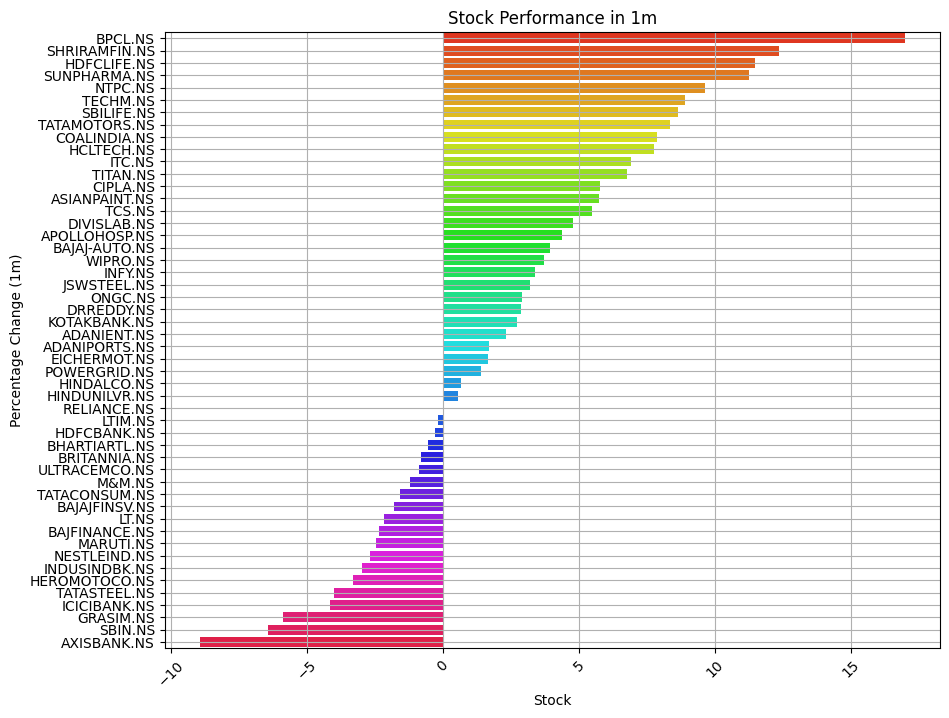

/var/folders/j2/1j8jd9j52j31d7tc3p69x4l0486525/T/ipykernel_37025/4119484062.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Symbol', x=t, data=sorted_df,palette='hsv')


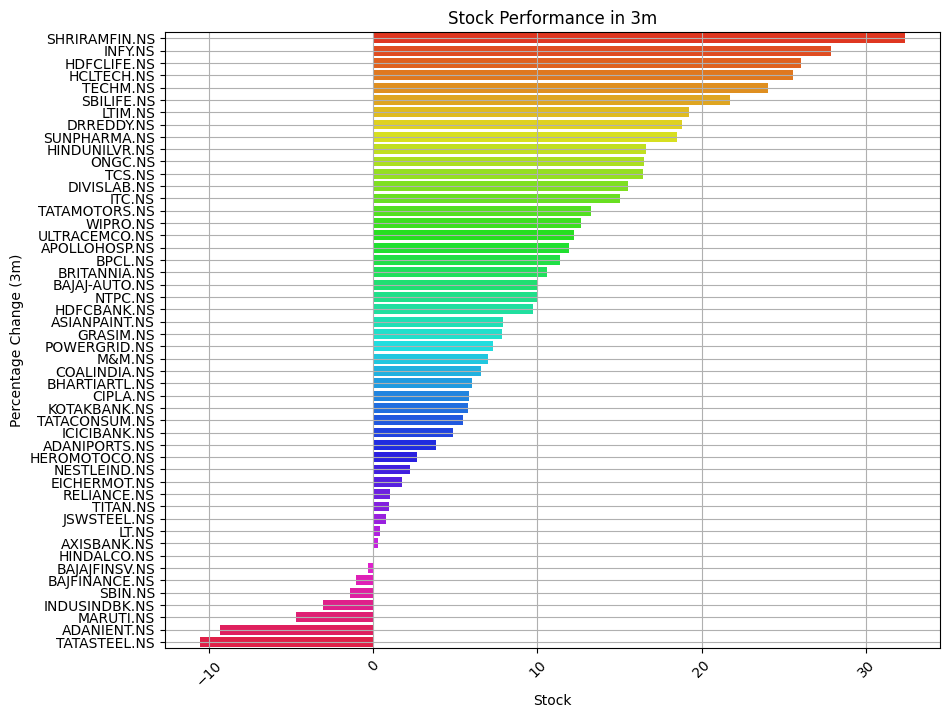

/var/folders/j2/1j8jd9j52j31d7tc3p69x4l0486525/T/ipykernel_37025/4119484062.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Symbol', x=t, data=sorted_df,palette='hsv')


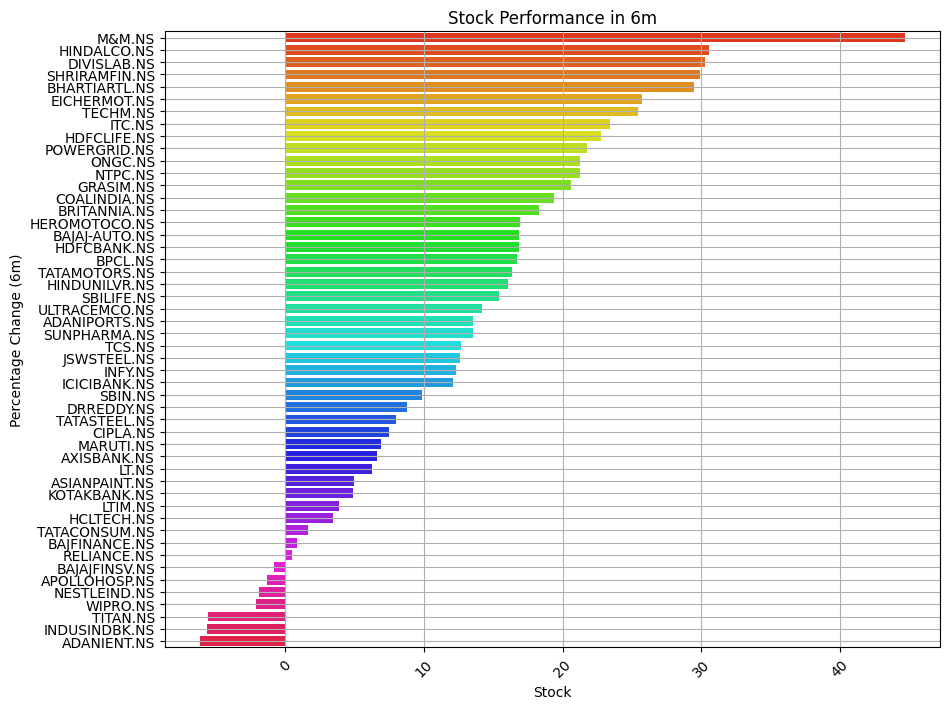

/var/folders/j2/1j8jd9j52j31d7tc3p69x4l0486525/T/ipykernel_37025/4119484062.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Symbol', x=t, data=sorted_df,palette='hsv')


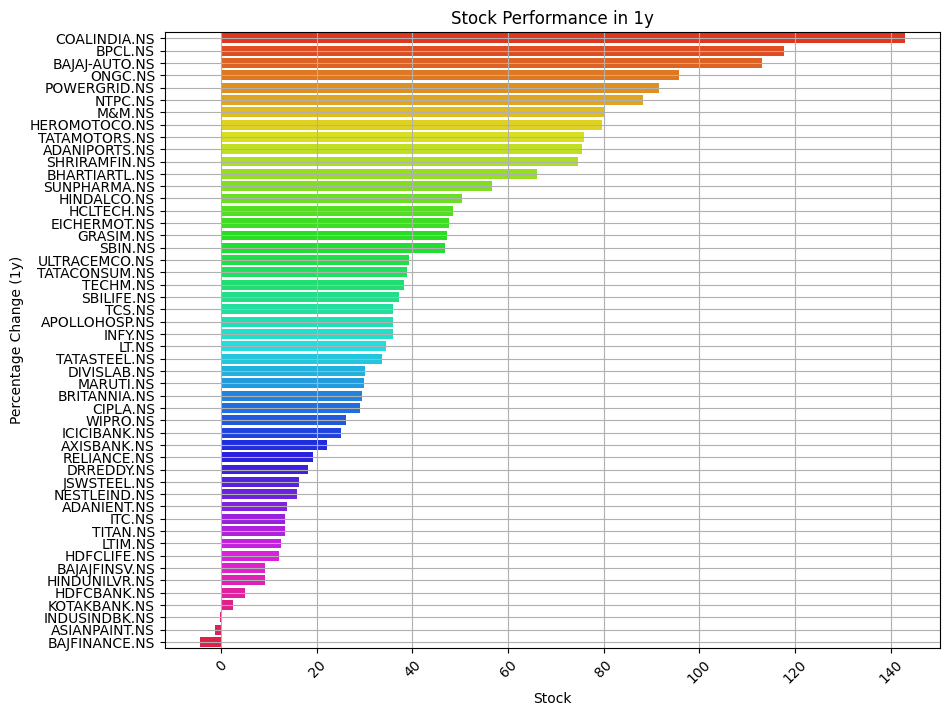

/var/folders/j2/1j8jd9j52j31d7tc3p69x4l0486525/T/ipykernel_37025/4119484062.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Symbol', x=t, data=sorted_df,palette='hsv')


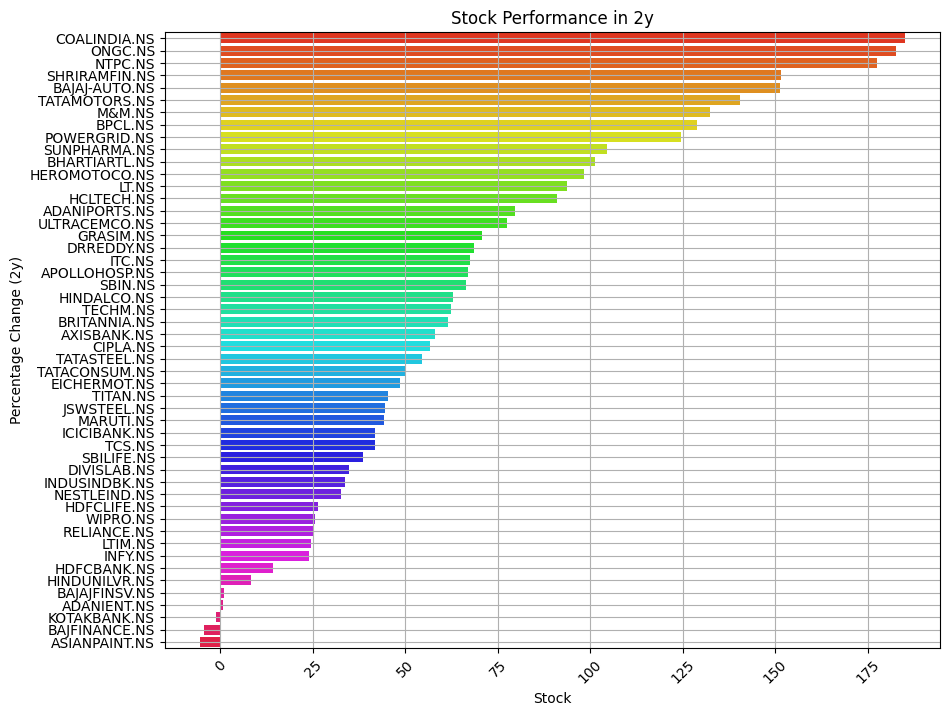

/var/folders/j2/1j8jd9j52j31d7tc3p69x4l0486525/T/ipykernel_37025/4119484062.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Symbol', x=t, data=sorted_df,palette='hsv')


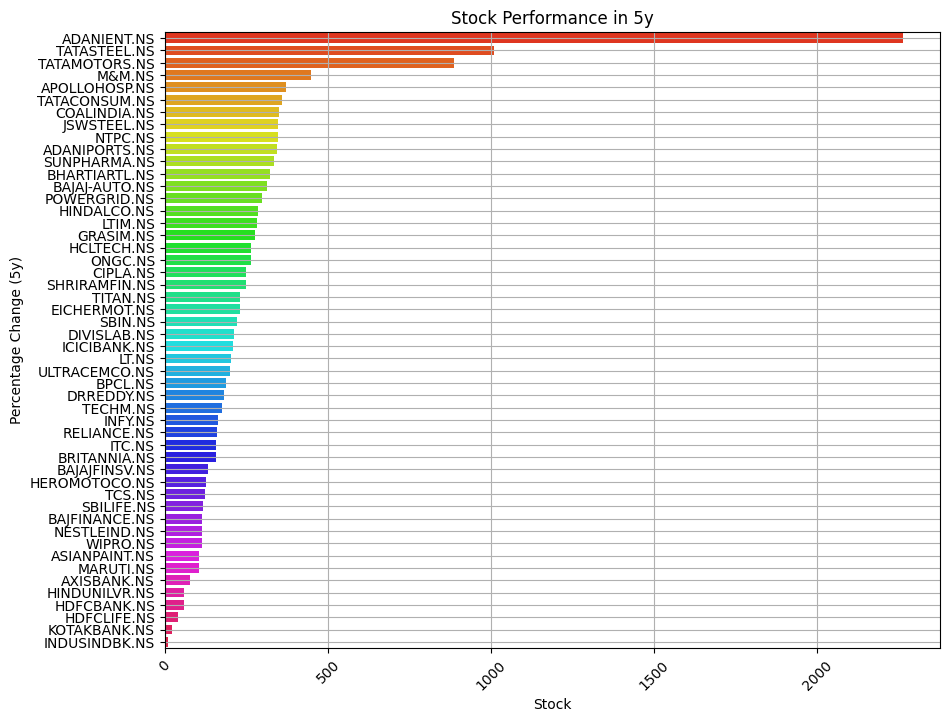

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

time_period = ['1m', '3m', '6m', '1y', '2y', '5y']

for t in time_period:
    sorted_df = prices_df.sort_values(by=t, ascending=False)
    plt.figure(figsize=(10, 8))
    sns.barplot(y='Symbol', x=t, data=sorted_df,palette='hsv')
    plt.title(f'Stock Performance in {t}')
    plt.xlabel('Stock')
    plt.ylabel(f'Percentage Change ({t})')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()